In [2]:
# importing the librarys
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
# Preview the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Check the shape and info
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Check for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
# Check class balance
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


In [9]:
# Convert TotalCharges to numeric (some values might be spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values in TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop customerID (not useful for modeling)
df.drop('customerID', axis=1, inplace=True)


/tmp/ipython-input-9-710084827.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [10]:
# Convert target variable to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Identify categorical features
cat_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[941  95]
 [202 171]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [14]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC Score: 0.8395315556843705


In [15]:
import joblib

# Save the model
joblib.dump(model, 'churn_model.pkl')

# If you did any preprocessing (like one-hot encoding), save that too or make a pipeline


['churn_model.pkl']

In [16]:
# After training your model, save the columns used in training
model_features = X_train.columns.tolist()

# Save model_features list for later use (e.g., as a pickle file or just keep in script)

# Then in your predict function:
def predict_churn(new_data_dict):
    df_new = pd.DataFrame([new_data_dict])

    # Reindex dataframe to have all columns in correct order, fill missing with 0
    df_new = df_new.reindex(columns=model_features, fill_value=0)

    proba = model.predict_proba(df_new)[0][1]
    prediction = model.predict(df_new)[0]
    return prediction, proba

# Example usage:
new_customer = {
    'tenure': 5,
    'MonthlyCharges': 70.5,
    'TotalCharges': 350.0,
    'gender_Male': 1,
    'SeniorCitizen': 0,
    'Partner_Yes': 1,
    'Dependents_Yes': 0,
    'PhoneService_Yes': 1,
    # Make sure to provide keys for all columns or let reindex fill them with 0
}

churn_pred, churn_prob = predict_churn(new_customer)
print(f"Prediction: {'Churn' if churn_pred==1 else 'No Churn'}, Probability: {churn_prob:.2f}")


Prediction: No Churn, Probability: 0.34


In [17]:
new_customer_2 = {
    'tenure': 24,
    'MonthlyCharges': 45.5,
    'TotalCharges': 1100.0,
    'gender_Male': 0,
    'SeniorCitizen': 1,
    'Partner_Yes': 0,
    'Dependents_Yes': 0,
    'PhoneService_Yes': 1,
    'MultipleLines_Yes': 1,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0,
    'OnlineSecurity_Yes': 0,
    'OnlineBackup_Yes': 0,
    'DeviceProtection_Yes': 0,
    'TechSupport_Yes': 0,
    'StreamingTV_Yes': 1,
    'StreamingMovies_Yes': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaperlessBilling_Yes': 1,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0,
    # Add all other one-hot encoded columns here, setting 0 if not applicable
}


In [18]:
churn_pred, churn_prob = predict_churn(new_customer_2)
print(f"Prediction: {'Churn' if churn_pred == 1 else 'No Churn'}, Probability: {churn_prob:.2f}")


Prediction: No Churn, Probability: 0.47


In [20]:
charming_customer = {
    'tenure': 1,                       # New customer, short tenure
    'MonthlyCharges': 99.9,            # High monthly charges
    'TotalCharges': 99.9,              # Very low total charges (just started)
    'gender_Male': 0,
    'SeniorCitizen': 0,
    'Partner_Yes': 0,
    'Dependents_Yes': 0,
    'PhoneService_Yes': 1,
    'MultipleLines_No phone service': 0,
    'MultipleLines_Yes': 0,
    'InternetService_Fiber optic': 1,  # Fiber optic (can have higher churn)
    'InternetService_No': 0,
    'OnlineSecurity_Yes': 0,
    'OnlineBackup_Yes': 0,
    'DeviceProtection_Yes': 0,
    'TechSupport_Yes': 0,
    'StreamingTV_Yes': 0,
    'StreamingMovies_Yes': 0,
    'Contract_One year': 0,
    'Contract_Two year': 0,           # No long-term contract
    'PaperlessBilling_Yes': 1,
    'PaymentMethod_Electronic check': 1,  # Electronic check users churn more often
    'PaymentMethod_Mailed check': 0,
    # fill in zeros for any other expected features...
}


In [21]:
pred, prob = predict_churn(charming_customer)
print(f"Prediction: {'Churn' if pred == 1 else 'No Churn'}, Probability: {prob:.2f}")


Prediction: Churn, Probability: 0.83


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
[[941  95]
 [202 171]]
ROC-AUC Score: 0.8395315556843705


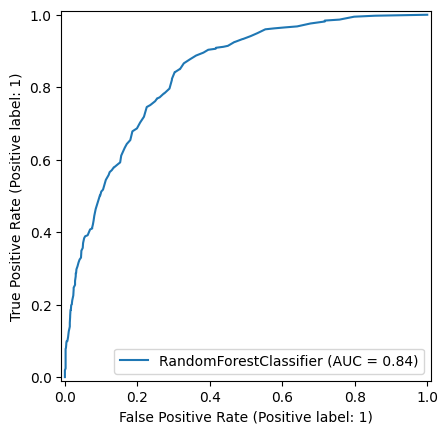

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Assuming y_test and y_pred are your true and predicted labels
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# Optional: Plot ROC curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
